In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import sklearn
# %matplotlib inline 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Expand the width of notebook for better view
from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [3]:
# Set Max rows and columns display for more details
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# Project Description
# The aim of this data science project is to build a predictive model and find out the sales of each
# product at a particular store.
# Using this model, BigMart will try to understand the properties of products and stores which play a 
# key role in increasing sales

In [5]:
# Combining the training and testing datasets
dftrain = pd.read_csv('./Train.csv')
dftest = pd.read_csv('./Test.csv')
df = pd.concat([dftrain, dftest], axis=0)
df = df.reset_index(drop=True)

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Performing Exploratory Data Analysis First

# Checking the dimesion of the data
df.shape

(14204, 12)

In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'], dtype='object')

In [9]:
# Info about the data and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


## Plotting for Numerical Values

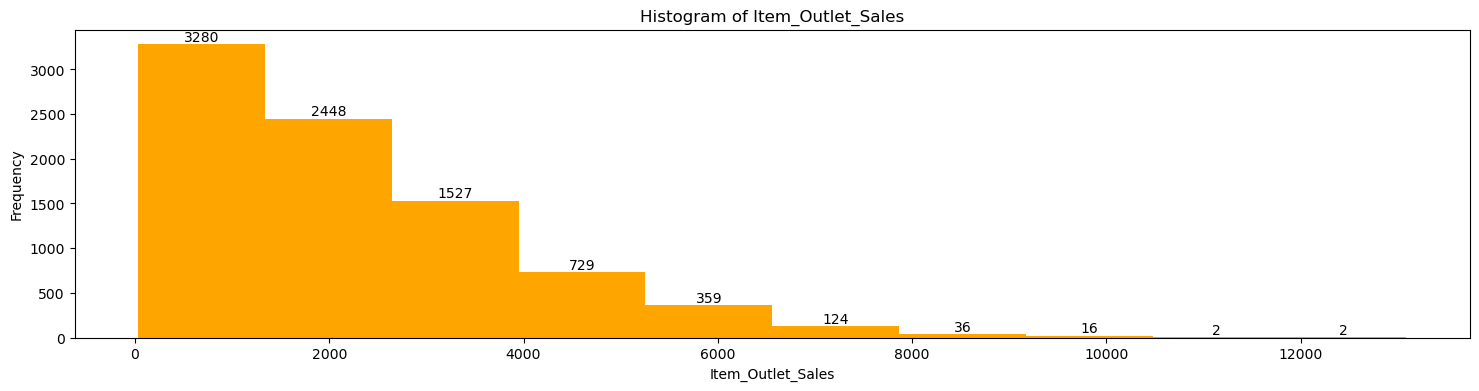

In [10]:
# Plotting the graph for Dependant variable or for Target variable
fig = plt.figure(figsize = (18,4))

# create histogram of Item_Weight column
n, bins, patches = plt.hist(df["Item_Outlet_Sales"], color='orange')

# get frequency count for each bin
bin_counts = [int(count) for count in n]

# add frequency count to top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 5
    plt.text(x, y, bin_counts[i], ha='center', va='bottom')

plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Frequency")
plt.title("Histogram of Item_Outlet_Sales")
plt.show()

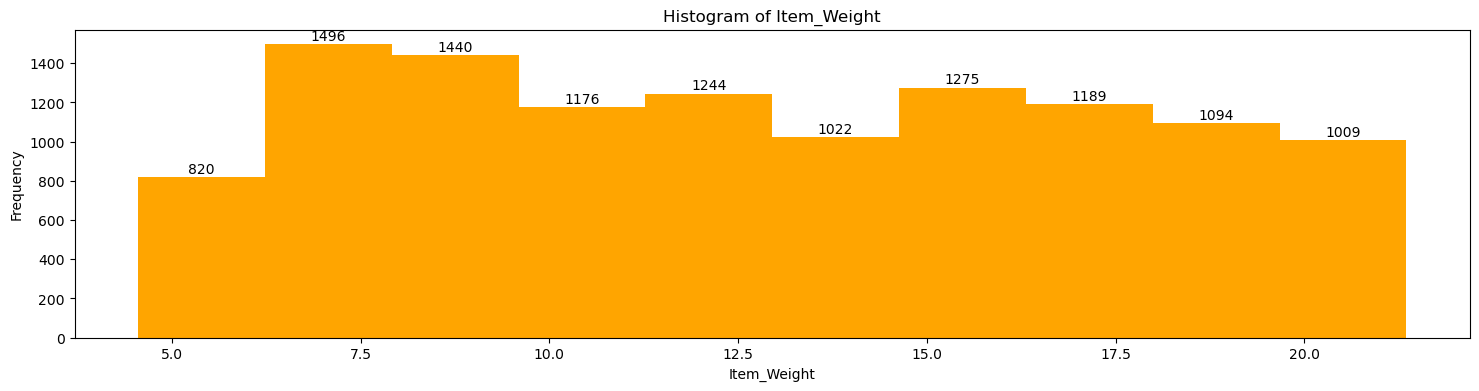

In [11]:
# Plotting Graphs for numerical Variable
fig = plt.figure(figsize = (18,4))

# create histogram of Item_Weight column
n, bins, patches = plt.hist(df["Item_Weight"], color='orange')

# get frequency count for each bin
bin_counts = [int(count) for count in n]

# add frequency count to top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 5
    plt.text(x, y, bin_counts[i], ha='center', va='bottom')

plt.xlabel("Item_Weight")
plt.ylabel("Frequency")
plt.title("Histogram of Item_Weight")
plt.show()

In [12]:
# Above we have seen that there are two columns in which missing values are, let's impute the 'Item_Weight' value to it's mean

In [13]:
# # Replacing from Mean
# mean_itemWeight = df['Item_Weight'].mean()
# df['Item_Weight'].replace(np.nan, mean_itemWeight, inplace = True)

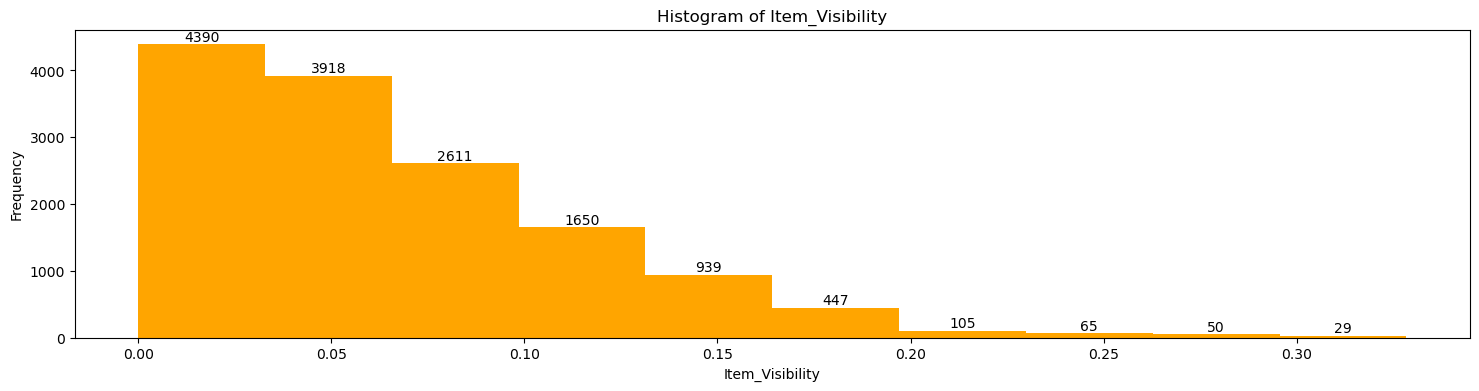

In [14]:
# Plotting Graphs for numerical Variable

fig = plt.figure(figsize = (18,4))

# create histogram of Item_Weight column
n, bins, patches = plt.hist(df["Item_Visibility"], color='orange')

# get frequency count for each bin
bin_counts = [int(count) for count in n]

# add frequency count to top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 5
    plt.text(x, y, bin_counts[i], ha='center', va='bottom')

plt.xlabel("Item_Visibility")
plt.ylabel("Frequency")
plt.title("Histogram of Item_Visibility")
plt.show()

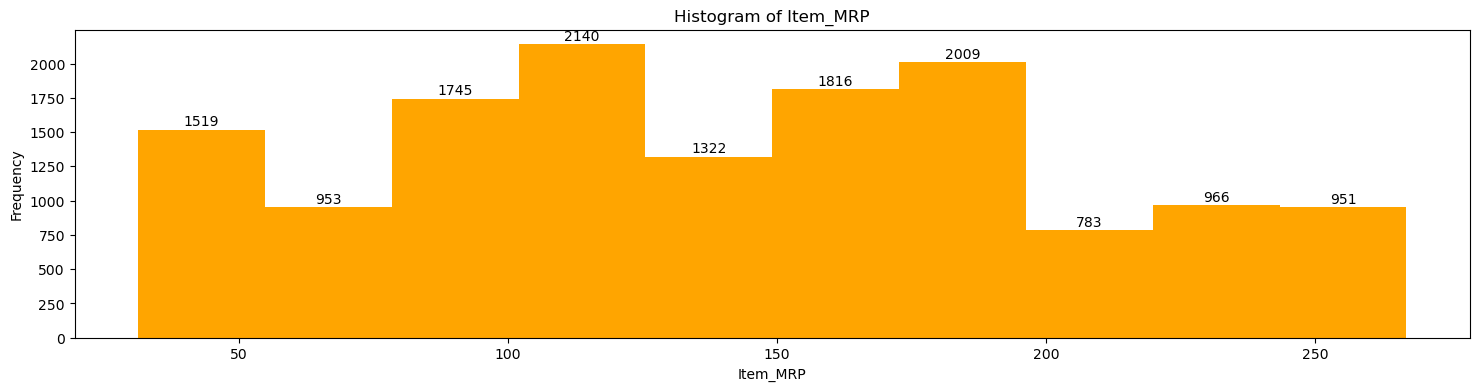

In [15]:
# Plotting Graphs for numerical Variable
fig = plt.figure(figsize = (18,4))

# create histogram of Item_MRP column
n, bins, patches = plt.hist(df["Item_MRP"], color='orange')

# get frequency count for each bin
bin_counts = [int(count) for count in n]

# add frequency count to top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 5
    plt.text(x, y, bin_counts[i], ha = 'center', va = 'bottom')

plt.xlabel("Item_MRP")
plt.ylabel("Frequency")
plt.title("Histogram of Item_MRP")
plt.show()

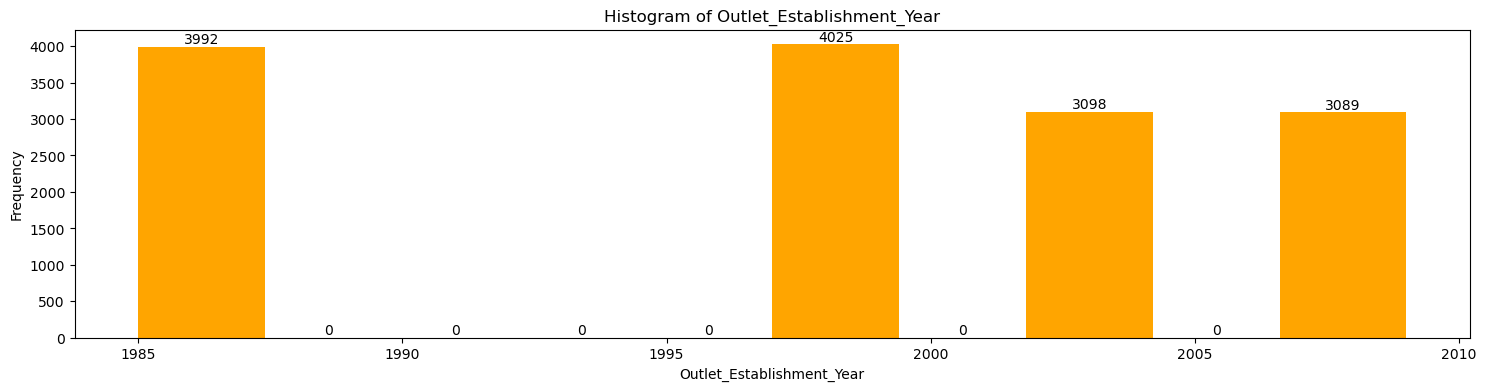

In [16]:
# Plotting Graphs for numerical Variable
fig = plt.figure(figsize = (18,4))

# create histogram of Item_MRP column
n, bins, patches = plt.hist(df["Outlet_Establishment_Year"], color='orange')

# get frequency count for each bin
bin_counts = [int(count) for count in n]

# add frequency count to top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 5
    plt.text(x, y, bin_counts[i], ha='center', va='bottom')

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Frequency")
plt.title("Histogram of Outlet_Establishment_Year")
plt.show()

## Plotting Graphs for Categorical Variables

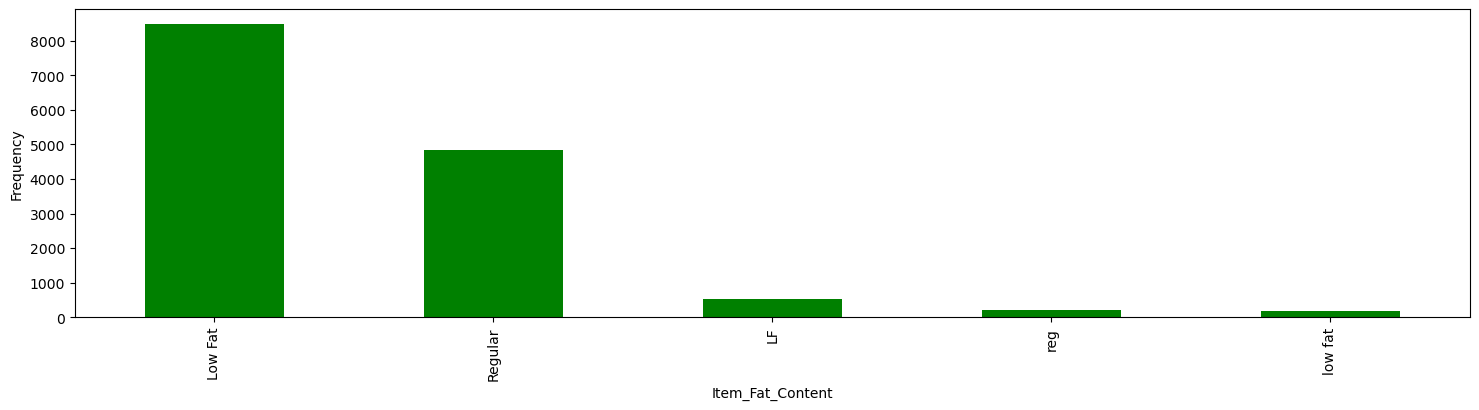

In [17]:
# Plotting the Graph for Categorical values
fig = plt.figure(figsize = (18,4))
# dfmain["Item_Fat_Content"].plot.hist()
df['Item_Fat_Content'].value_counts().plot(kind='bar', color = 'green')
plt.xlabel("Item_Fat_Content")
plt.ylabel('Frequency')
plt.show()

In [18]:
# Let's change the same values LF, reg to Low Fat and Regular, low fat to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

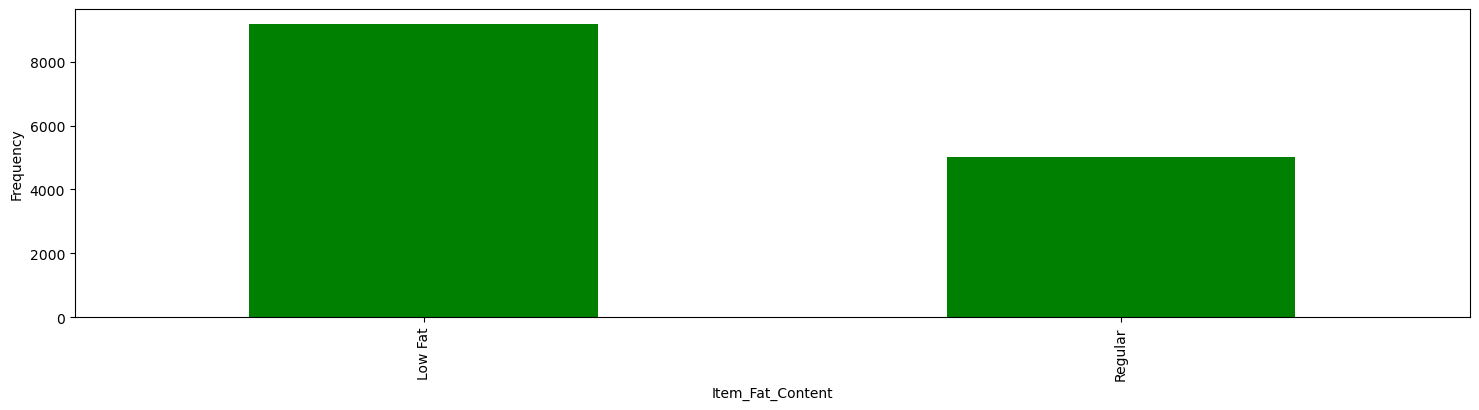

In [19]:
# Values replaced, plotting the graph below for verification
fig = plt.figure(figsize = (18,4))
# dfmain["Item_Fat_Content"].plot.hist()
df['Item_Fat_Content'].value_counts().plot(kind='bar', color = 'green')
plt.xlabel("Item_Fat_Content")
plt.ylabel('Frequency')
plt.show()

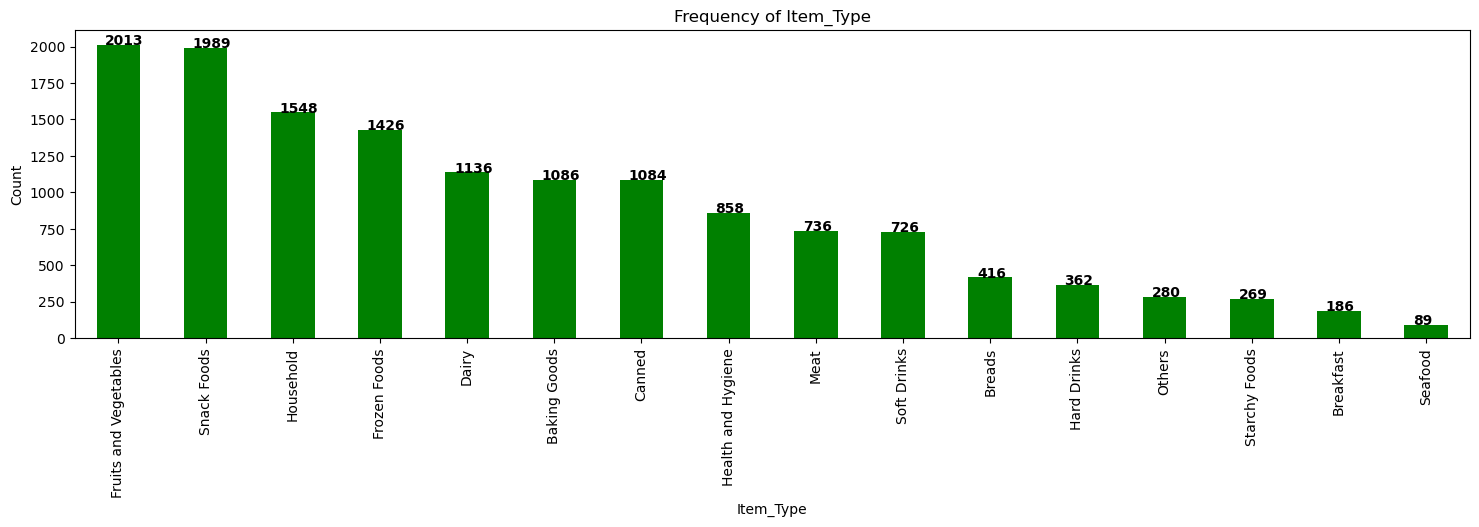

In [20]:
# Plotting the ar Graph for Categorical values
fig = plt.figure(figsize = (18,4))
count = df['Item_Type'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel('Item_Type')
plt.ylabel('Count')
plt.title('Frequency of Item_Type')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()
None

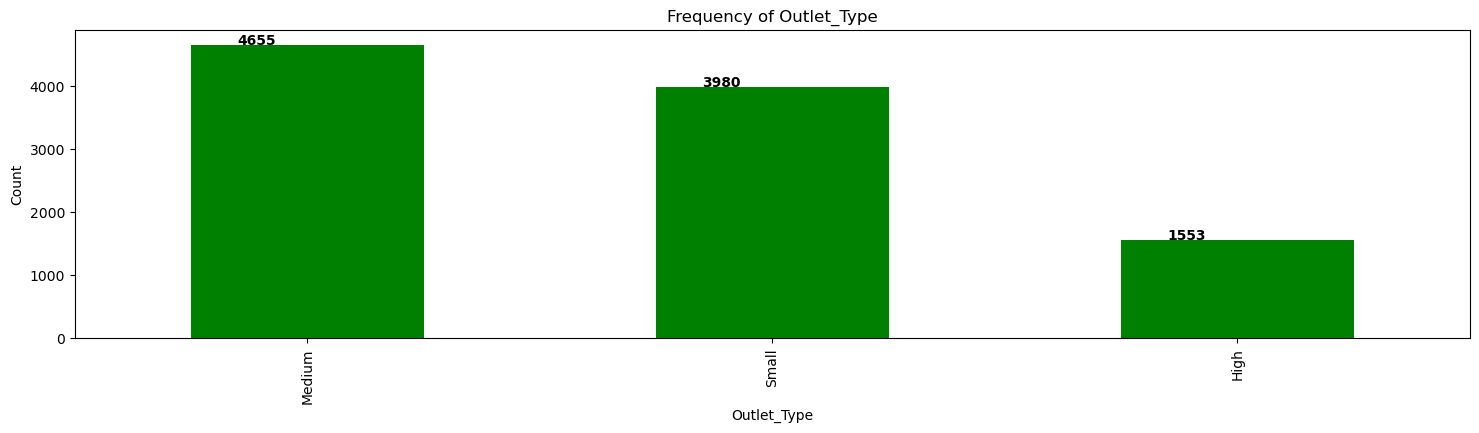

In [21]:
# Plotting the Graph for Categorical values
fig = plt.figure(figsize = (18,4))
count = df['Outlet_Size'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("Outlet_Type")
plt.ylabel('Count')
plt.title('Frequency of Outlet_Type')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

In [22]:
# Above graph shoes that Outlet_Type have some missing values

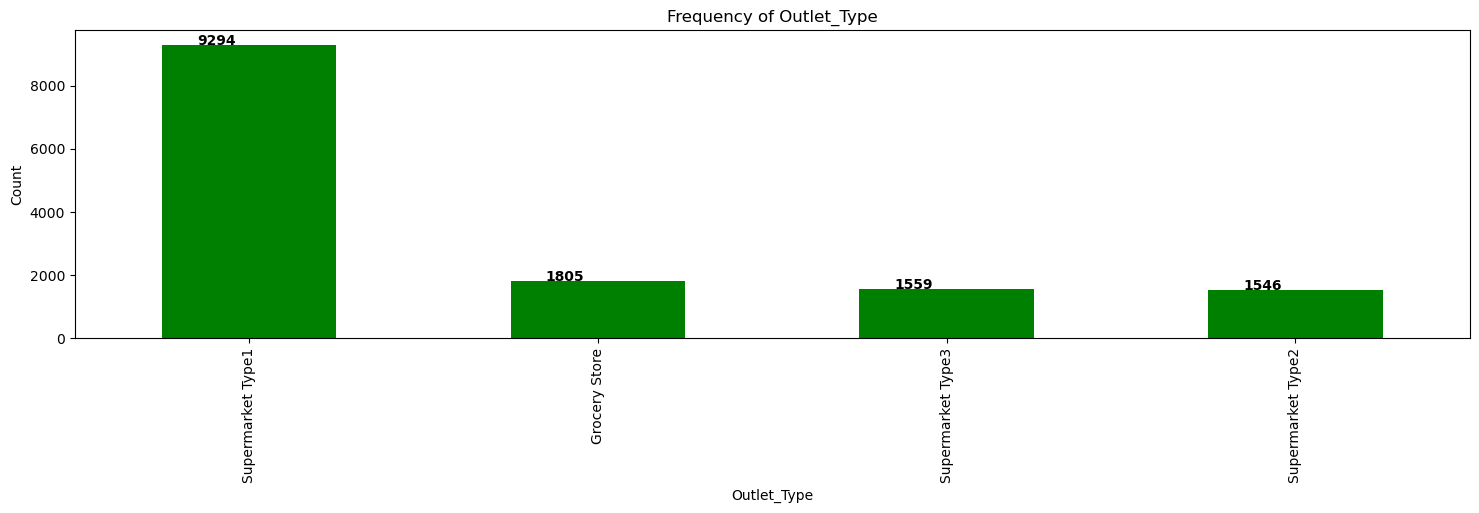

In [23]:
# Plotting the ar Graph for Categorical values
fig = plt.figure(figsize = (18,4))
count = df['Outlet_Type'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("Outlet_Type")
plt.ylabel('Count')
plt.title('Frequency of Outlet_Type')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

## Bivariate Analysis through Scatter Plot

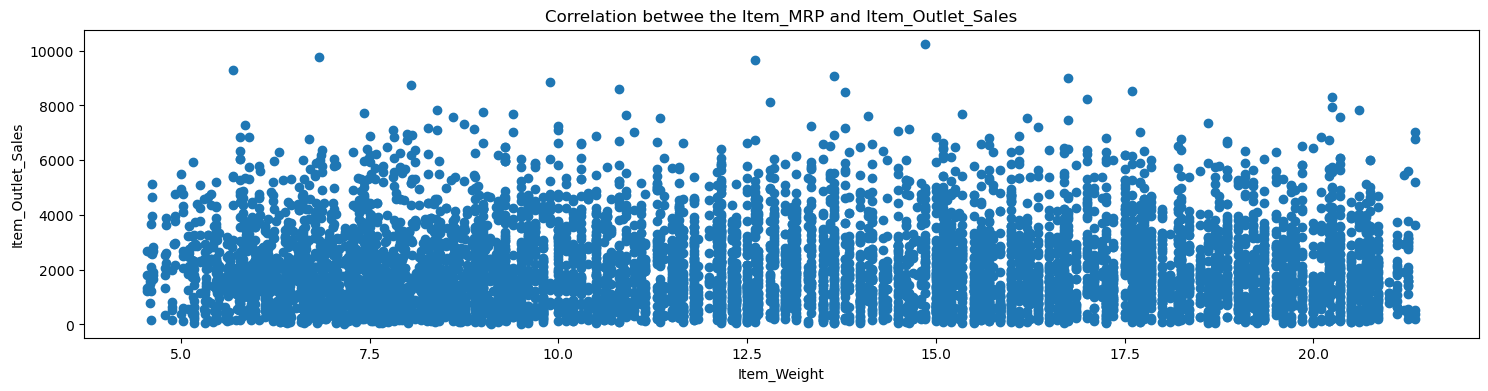

In [24]:
# Target Variables Vs. Independent Numerical Variables
# Plotting the Scatter Plot
fig = plt.figure(figsize = (18,4))
x = df['Item_Weight']
y = df['Item_Outlet_Sales']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Correlation betwee the Item_MRP and Item_Outlet_Sales')
plt.show()

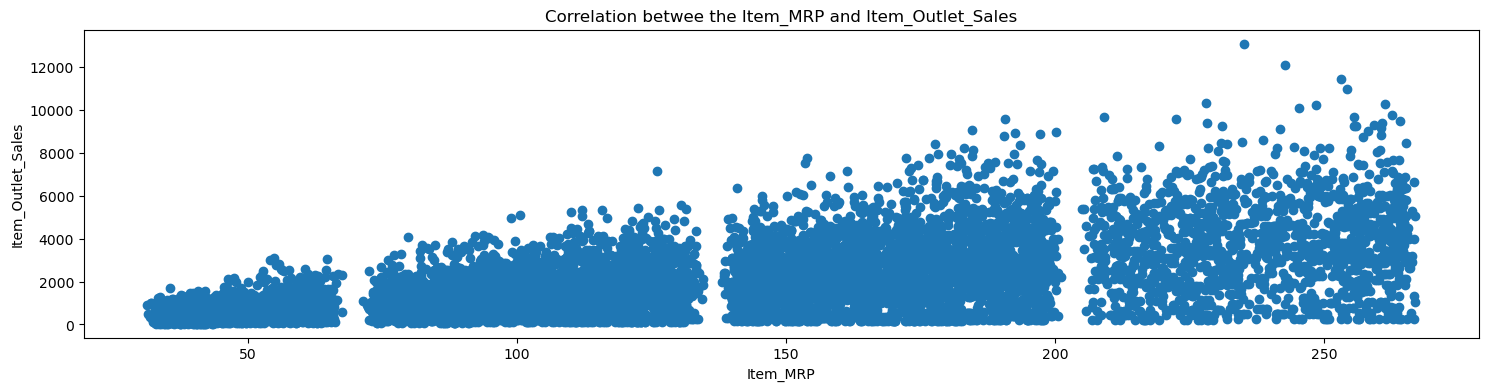

In [25]:
# Target Variables Vs. Independent Numerical Variables
# Plotting the Scatter Plot
fig = plt.figure(figsize = (18,4))
x = df['Item_MRP']
y = df['Item_Outlet_Sales']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Correlation betwee the Item_MRP and Item_Outlet_Sales')
plt.show()

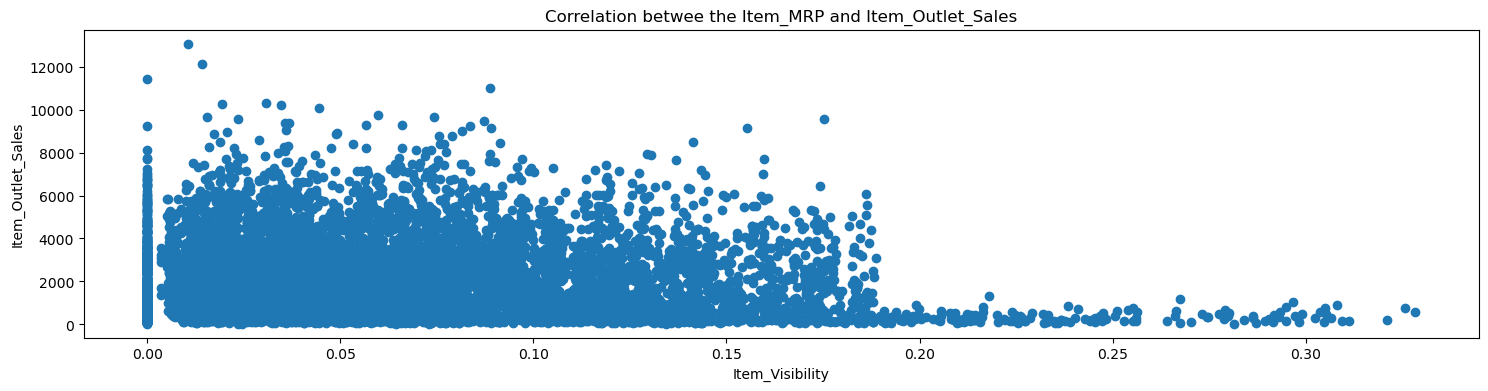

In [26]:
# Target Variables Vs. Independent Numerical Variables
# Plotting the Scatter Plot
fig = plt.figure(figsize = (18,4))
x = df['Item_Visibility']
y = df['Item_Outlet_Sales']

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Correlation betwee the Item_MRP and Item_Outlet_Sales')
plt.show()

In [27]:
# # count the total missing values in each column
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [28]:
# Let's check how many column in whole dataframe contain the "0" values
num_zeros = (df == 0).sum()
num_zeros

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              879
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

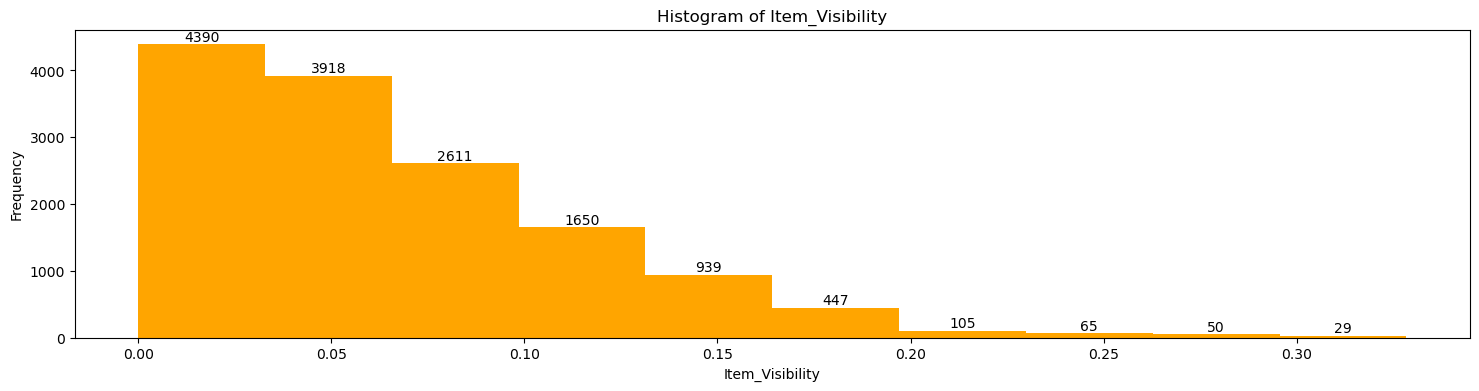

In [29]:
# Plotting the graph for Dependant variable or for Target variable
fig = plt.figure(figsize = (18,4))

# create histogram of Item_Weight column
n, bins, patches = plt.hist(df["Item_Visibility"], color='orange')

# get frequency count for each bin
bin_counts = [int(count) for count in n]

# add frequency count to top of each bar
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 5
    plt.text(x, y, bin_counts[i], ha='center', va='bottom')

plt.xlabel("Item_Visibility")
plt.ylabel("Frequency")
plt.title("Histogram of Item_Visibility")
plt.show()

In [30]:
# # Let's confirm the column again
zero_col = (df['Item_Visibility'] == 0).sum()
zero_col

879

In [31]:
# # Above we can see that there is only one column that contain 0 values that are 526 values in total
# # I am going to remove as there are only 526 values hence it will not affect our data
df.drop(df[df['Item_Visibility'] == 0].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13325 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            13325 non-null  object 
 1   Item_Weight                11032 non-null  float64
 2   Item_Fat_Content           13325 non-null  object 
 3   Item_Visibility            13325 non-null  float64
 4   Item_Type                  13325 non-null  object 
 5   Item_MRP                   13325 non-null  float64
 6   Outlet_Identifier          13325 non-null  object 
 7   Outlet_Establishment_Year  13325 non-null  int64  
 8   Outlet_Size                9539 non-null   object 
 9   Outlet_Location_Type       13325 non-null  object 
 10  Outlet_Type                13325 non-null  object 
 11  Item_Outlet_Sales          7997 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [32]:
# # Let's confirm the column again
zero_col = (df['Item_Visibility'] == 0).sum()
zero_col

0

In [33]:
# group the data by Item_Identifier and calculate the mean of Item_Weight
item_weight_means = df.groupby('Item_Identifier')['Item_Weight'].mean()

# fill missing values in Item_Weight using the means for each Item_Identifier
df['Item_Weight'] = df.apply(lambda x: item_weight_means[x['Item_Identifier']] if pd.isnull(x['Item_Weight']) else x['Item_Weight'], axis=1)

In [34]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  3786
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5328
dtype: int64

In [35]:
# Now we have a cetegorical column that contain missing values too

# extract the 'Outlet_Size' column as a numpy array with missing values replaced by NaN
X = df[['Outlet_Size']].values
X[X == None] = np.nan

# create an instance of SimpleImputer with 'most_frequent' strategy for categorical imputation
imputer = SimpleImputer(strategy='most_frequent')

# fit and transform the imputer to fill missing values in the dataset
df['Outlet_Size'] = imputer.fit_transform(X)

In [36]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5328
dtype: int64

In [37]:
df.groupby([df['Item_Identifier'].str[:2], 'Item_Type']).size().unstack().fillna(0)

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Identifier,,,,,,,,,,,,,,,,
DR,0.0,0.0,0.0,0.0,211.0,0.0,0.0,338.0,0.0,0.0,0.0,0.0,0.0,0.0,678.0,0.0
FD,1006.0,393.0,177.0,1024.0,862.0,1337.0,1883.0,0.0,0.0,0.0,687.0,0.0,85.0,1872.0,0.0,248.0
NC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,801.0,1463.0,0.0,260.0,0.0,0.0,0.0,0.0


In [38]:
df['Item_category'] = df['Item_Identifier'].str[:2]
df['Item_category']

0        FD
1        DR
2        FD
6        FD
7        FD
         ..
14198    FD
14199    FD
14200    FD
14201    NC
14203    FD
Name: Item_category, Length: 13325, dtype: object

In [39]:
df.loc[df['Item_category'] == 'NC', 'Item_Fat_Content'] = 'Non-Edible'
# years of operation for outlets 
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year'] 
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category') 
# Price per unit weight 
df['price_per_unit_wt'] = df['Item_MRP'] / df['Item_Weight']

In [40]:
df['Item_category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [41]:
df['Item_MRP_clusters'] = pd.cut(df['Item_MRP'], bins=[0, 69, 136, 203, float('inf')], labels=['1st', '2nd', '3rd', '4th'])

In [42]:
# Lable Encoding
df['Outlet_Size_num'] = df['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})
df['Outlet_Location_Type_num'] = df['Outlet_Location_Type'].map({'Tier 3': 0, 'Tier 2': 1, 'Tier 1': 2})

In [43]:
df.drop(columns=['Outlet_Size', 'Outlet_Location_Type'], inplace=True)

In [47]:

# create a copy of the combi DataFrame without the specified columns
df_new = df.drop(columns=["Item_Identifier", "Outlet_Establishment_Year", "Item_Type"])

# create an instance of the OneHotEncoder class and fit it to the new DataFrame
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore").fit(df_new)

# transform the new DataFrame using the fitted encoder and convert the result to a DataFrame
ohe_df = pd.DataFrame(ohe.transform(df_new), columns=ohe.get_feature_names(df_new.columns))

# combine the original "Item_Identifier" column with the encoded DataFrame
df = pd.concat([df["Item_Identifier"], ohe_df], axis=1)

In [45]:
df["Item_Visibility"] = np.log(df["Item_Visibility"] + 1)
df["price_per_unit_wt"] = np.log(df["price_per_unit_wt"] + 1)

In [46]:
from sklearn.preprocessing import StandardScaler

num_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_vars.remove("Item_Outlet_Sales")

df_numeric = df[num_vars]
prep_num = StandardScaler().fit(df_numeric)

df_numeric_norm = prep_num.transform(df_numeric)

df = df.drop(num_vars, axis=1)
df[num_vars] = df_numeric_norm

In [49]:
train = df[:nrow(train)]
test = df[nrow(train)+1:]

In [ ]:
# Leaving the Missing data in Item_Outlet_Sales as it belong to the test dataset

In [ ]:
# # Let's look at the minimum value, mean values, different percentile values, and maximum values.
# df.describe()
# # Test5682, Traiing 8524, Total 14,206

In [ ]:
# # count the total missing values in each column
# df.isnull().sum()

In [ ]:
# df.isnull().sum()

In [ ]:
# counts = df['Outlet_Size'].value_counts()
# counts

In [ ]:
# df['Item_Fat_Content'].unique()

In [ ]:
# df['Item_Fat_Content'].unique()

In [ ]:
# df.columns

In [ ]:
# df.boxplot(column = ['Item_Outlet_Sales'])
# plt.show()

In [ ]:
# def remove_outlier(col):
#     sorted(col)
#     Q1, Q3 = col.quantile([0.25, 0.75])
#     IQR = Q3 - Q1
#     lower_range = Q1 - (1.5 * IQR)
#     upper_range = Q3 - (1.5 * IQR)
#     return lower_range, upper_range

In [ ]:
# lowsale, highsale = remove_outlier(df['Item_Outlet_Sales'])
# df['Item_Outlet_Sales'] = np.where(df['Item_Outlet_Sales'] > highsale, highsale, df['Item_Outlet_Sales'])
# df['Item_Outlet_Sales'] = np.where(df['Item_Outlet_Sales'] < lowsale, lowsale, df['Item_Outlet_Sales'])

In [ ]:
# df.boxplot(column = ['Item_Outlet_Sales'])
# plt.show()

In [ ]:
# # Univariate analysis through scatter plot
# # Here we have obsereved from above table that there is moderate correclation between Item_Outlet_Sales and Item_MRP, lets plot this
# # For Numerical to Numerical we can plot different plots like Scatterplot, Line Plot, Heatmap for correlation and Joint Plot

# # Plotting the Scatter Plot
# x = df['Item_MRP']
# y = df['Item_Outlet_Sales']

# # Create a scatter plot
# plt.scatter(x, y)
# plt.xlabel('Item_MRP')
# plt.ylabel('Item_Outlet_Sales')
# plt.title('Correlation betwee the Item_MRP and Item_Outlet_Sales')
# plt.show()

In [ ]:
# # Bivariate analysis through Correlation
# df.corr()

In [ ]:
# # Creating a new column to check if zero values are totally cleaned or not
# if_zero = (df == 0).sum()
# if_zero

In [ ]:
# # Dropping some columns that I think are not useful for further processing
# df2 = df.drop(['Item_Identifier', 'Item_Visibility'], axis = 'columns')
# df2.head()